Index No: 215554D  
Name: SABAR SA

In [1]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [27]:
# define the variables

room_temp = ctrl.Antecedent(np.arange(0,41,1), 'room_temp')
comfort_level = ctrl.Antecedent(np.arange(0,101,1), 'comfort_level')
heating_power = ctrl.Consequent(np.arange(0,101,1), 'heating_power')

In [28]:
#room_temp membership functions: 'cold', 'comfortable', 'hot'

room_temp['cold'] = fuzz.trapmf(room_temp.universe, [0,0,5,20])
room_temp['comfortable'] = fuzz.trapmf(room_temp.universe, [0,15,25,40])
room_temp['hot'] = fuzz.trapmf(room_temp.universe, [20,35,40,40])

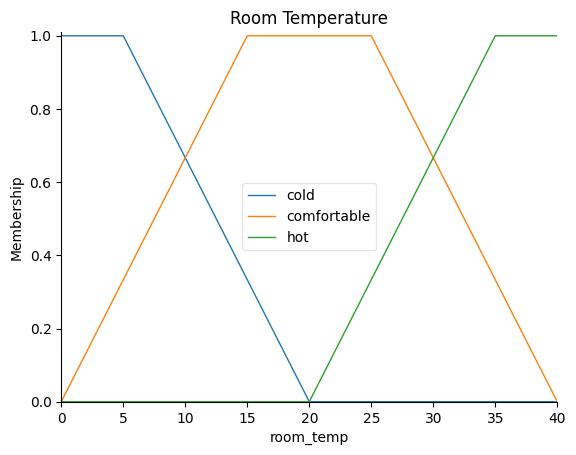

In [29]:
room_temp.view()
plt.title("Room Temperature")
plt.show()

In [30]:
#comfort_level membership functions: 'very_cold', 'cold', 'comfortable', 'warm', 'very_warm'

comfort_level['very_cold'] = fuzz.trapmf(comfort_level.universe, [0,0,5,25])
comfort_level['cold'] = fuzz.trapmf(comfort_level.universe, [0, 20, 30, 50])
comfort_level['comfortable'] = fuzz.trapmf(comfort_level.universe, [25,35,60,75])
comfort_level['warm'] = fuzz.trapmf(comfort_level.universe, [50,65,75,90])
comfort_level['very_warm'] = fuzz.trapmf(comfort_level.universe, [75,90,100,100])

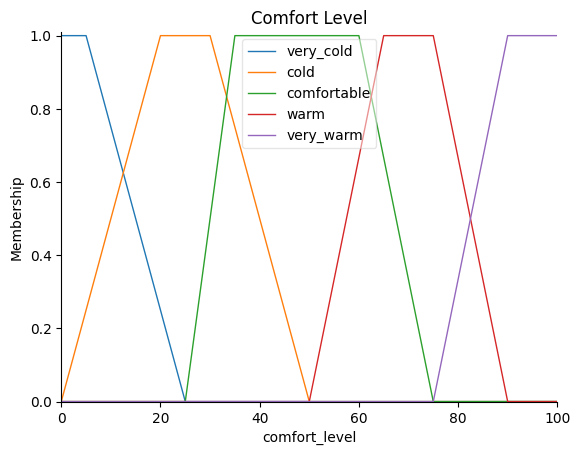

In [31]:
comfort_level.view()
plt.title("Comfort Level")
plt.show()

In [32]:
#define the output

#heating_power membership function. "low", "medium" or "high"
heating_power['low'] = fuzz.trapmf(heating_power.universe, [0,0, 20, 50])
heating_power['medium'] = fuzz.trapmf(heating_power.universe, [0,30,60, 100])
heating_power['high'] = fuzz.trapmf(heating_power.universe, [50,80,100, 100])

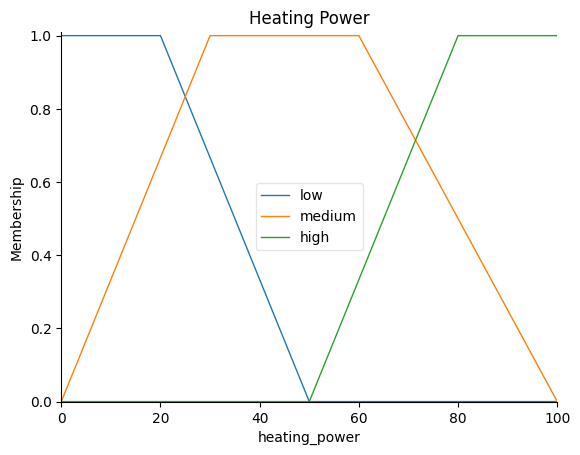

In [33]:
heating_power.view()
plt.title("Heating Power")
plt.show()

In [34]:
# define the fuzzy rules

rule1 = ctrl.Rule(room_temp['cold'] | comfort_level['very_warm'], heating_power['high'])
rule2 = ctrl.Rule(room_temp['cold'] | comfort_level['warm'], heating_power['medium'])
rule4 = ctrl.Rule(room_temp['hot'], heating_power['low'])
rule5 = ctrl.Rule(room_temp['comfortable'] | comfort_level['cold'], heating_power['low'])
rule3 = ctrl.Rule(room_temp['comfortable'] | comfort_level['comfortable'], heating_power['medium'])
rule6 = ctrl.Rule(room_temp['comfortable'] | comfort_level['warm'], heating_power['high'])
#

In [36]:
heating_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
heating = ctrl.ControlSystemSimulation(heating_control)

Heating Power: 55.28%


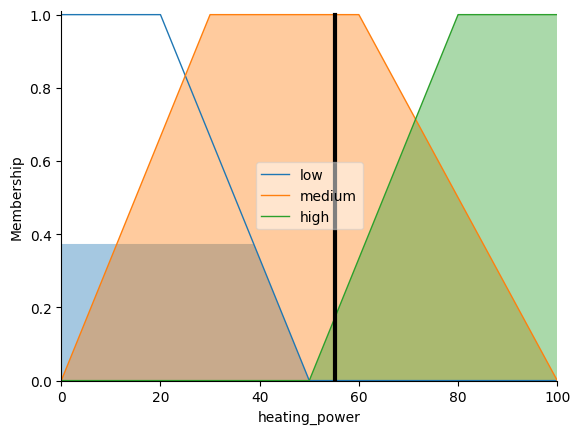

In [37]:
room_temp = 5.6
comfort_level = 65
heating.input['room_temp'] = room_temp
heating.input['comfort_level'] = comfort_level
heating.compute()
heat_amount = heating.output['heating_power']
print(f"Heating Power: {heat_amount:.2f}%")
heating_power.view(sim=heating)

Heating Power: 49.11%


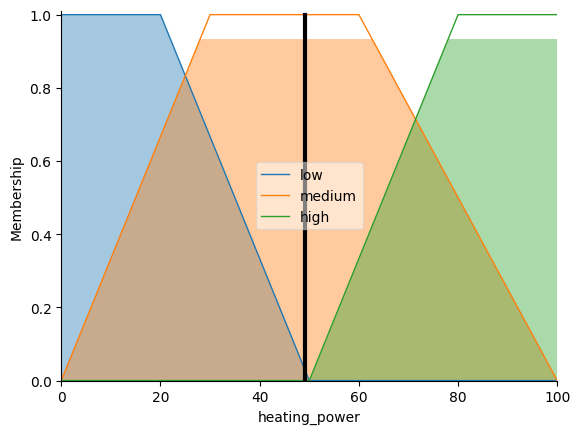

In [39]:
room_temp = 6
comfort_level = 25

heating.input['room_temp'] = room_temp
heating.input['comfort_level'] = comfort_level
heating.compute()
heat_amount = heating.output['heating_power']
print(f"Heating Power: {heat_amount:.2f}%")
heating_power.view(sim=heating)